In [1]:
import sys
sys.path.append("../python")

from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations
import json
import xarray as xr

In [2]:
parameters_path_mh = "../configs/mh_with_orientation.json"
parameters_path_mlda = "../configs/mlda_with_orientation.json"
 
file = open(parameters_path_mh)
config = json.load(file)
file.close()

file = open(parameters_path_mlda)
config_mlda = json.load(file)
file.close()

In [3]:
# Set center
center = (config["Geometry"]["Center"]["x"], config["Geometry"]["Center"]["y"])

# Set type
dipole_type = config["ModelConfig"]["Dipole"]["Type"]

# Set dipole
position = (config["ModelConfig"]["Dipole"]["Position"]["x"],config["ModelConfig"]["Dipole"]["Position"]["y"])

sample_path = config["Setup"]["OutputPath"] + config["Sampling"]["ResultFile"] + ".h5"
fin = h5py.File("/home/anne/Masterarbeit/masterarbeit/2d/results/mh_new_0.h5")
samples_mh = np.array( fin['/samples'] )[:,:]
fin.close()

n = len(samples_mh[0])
rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
s_ref = utility_functions.get_dipole(position,center,rho)
sample_dict = {
    "x": samples_mh[0],
    "y": samples_mh[1],
    "rho": samples_mh[2]
}

sample_dataset_mh = az.dict_to_dataset(sample_dict)

sample_path = config_mlda["Setup"]["OutputPath"] + config_mlda["Sampling"]["ResultFile"] + ".h5"
fin = h5py.File("/home/anne/Masterarbeit/masterarbeit/2d/results/mlda_0.h5")
#fin = h5py.File("/home/anne/Masterarbeit/masterarbeit/2d/results/samples_mlda_01.h5")
samples_mlda = np.array( fin['/samples'] )[:,:]
fin.close()

n = len(samples_mlda[0])
rho = config["ModelConfig"]["Dipole"]["Orientation"]["rho"]
s_ref = utility_functions.get_dipole(position,center,rho)
sample_dict_mlda = {
    "x": samples_mlda[0],
    "y": samples_mlda[1],
    "rho": samples_mlda[2]
}

sample_dataset_mlda = az.dict_to_dataset(sample_dict_mlda)

#sample_dataset = xr.merge(sample_dict,sample_dict_mlda)
#print(sample_dataset)

In [4]:
print("MH:")
print("Effective sample size: " + str(az.ess(sample_dataset_mh)))
print("Autocorrelation time: " + str(len(samples_mh[0])/az.ess(sample_dataset_mh)))

print("MLDA:")
print("Effective sample size: " + str(az.ess(sample_dataset_mlda)))
print("Autocorrelation time: " + str(len(samples_mlda[0])/az.ess(sample_dataset_mlda)))



MH:
Effective sample size: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 910.0
    y        float64 1.101e+03
    rho      float64 1.489e+03
Autocorrelation time: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 1.099e+03
    y        float64 907.9
    rho      float64 671.7
MLDA:
Effective sample size: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 8.119
    y        float64 4.545
    rho      float64 8.119
Autocorrelation time: <xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 615.9
    y        float64 1.1e+03
    rho      float64 615.9


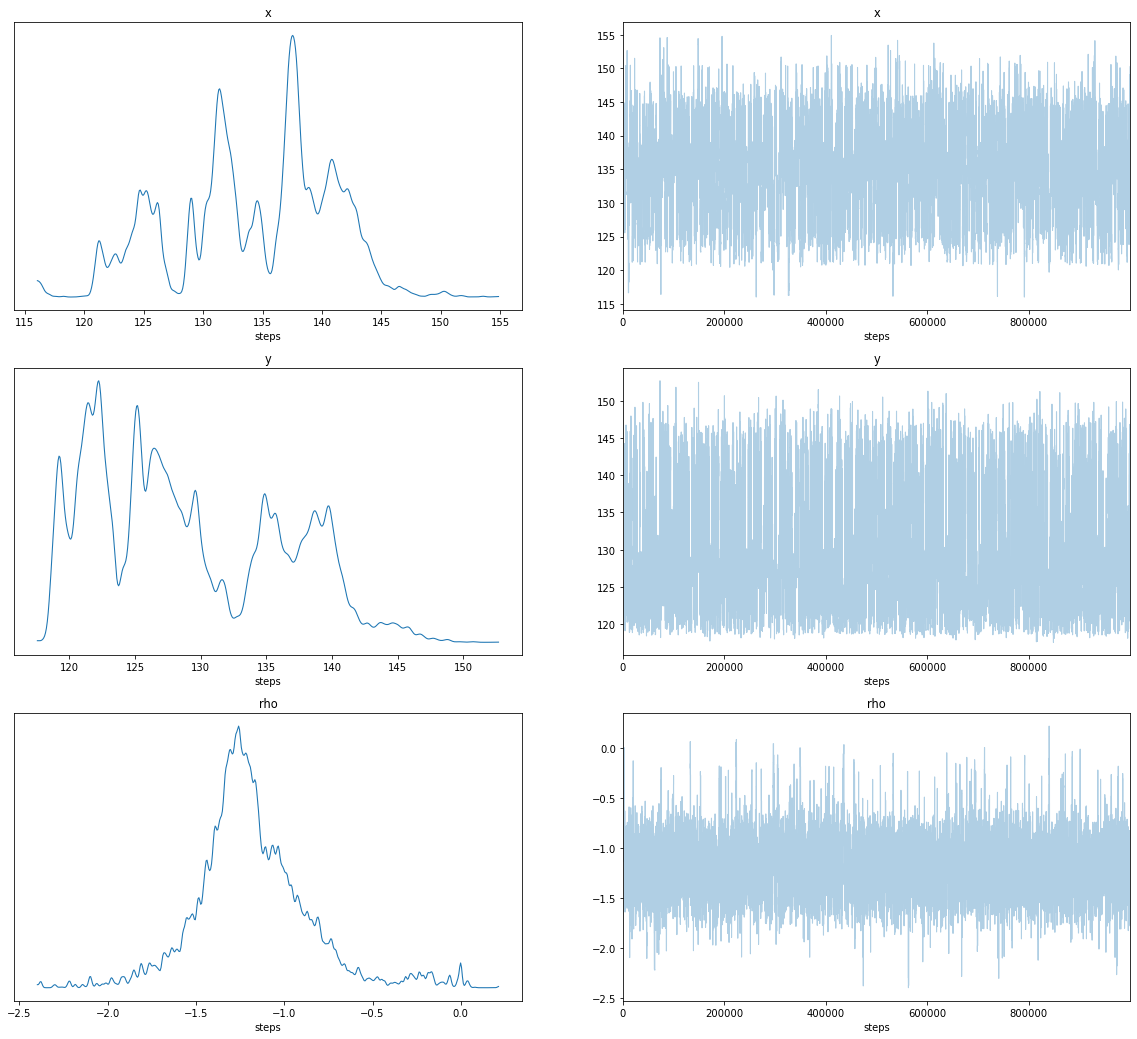

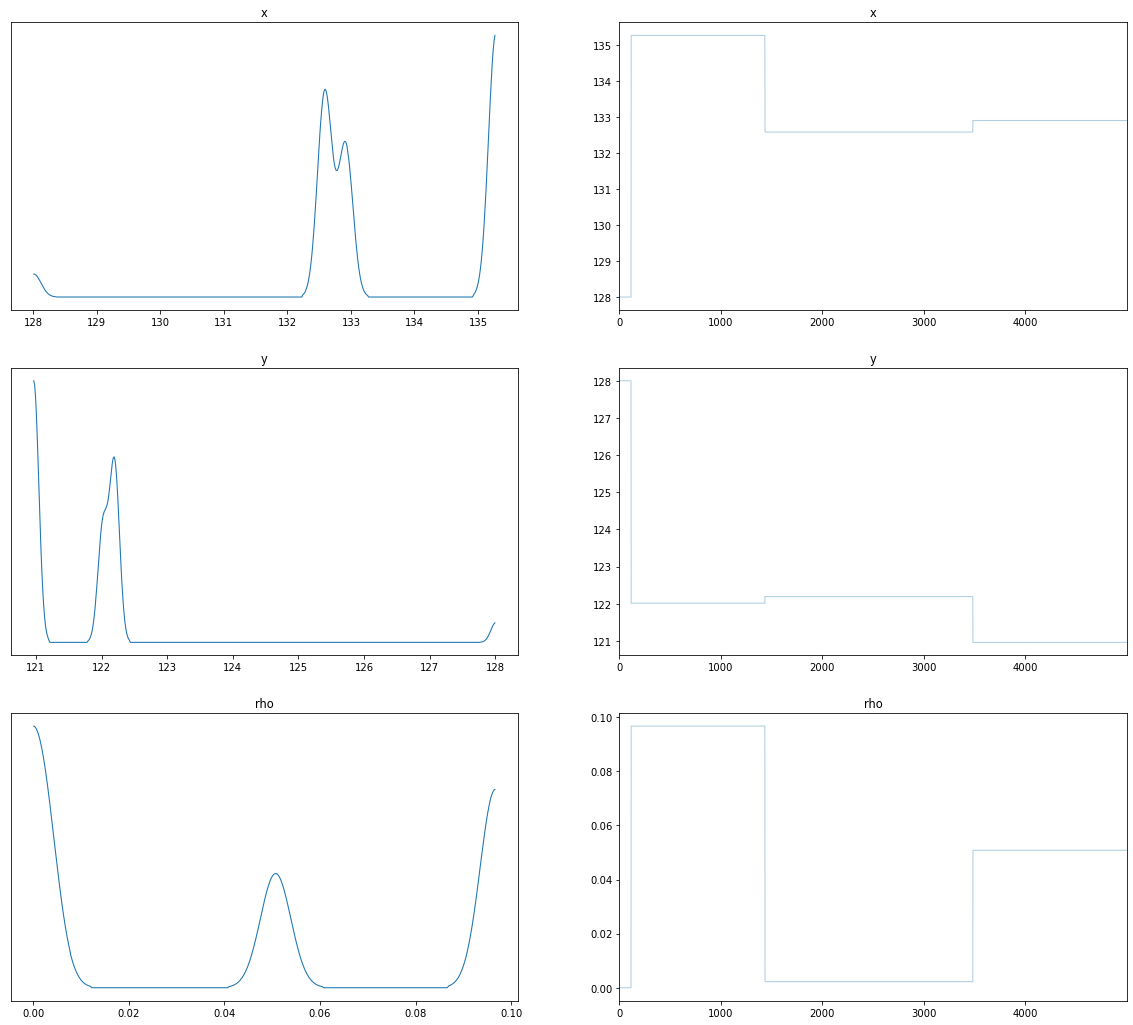

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(20,18))

for ax in axes.flatten():
    ax.set_xlabel('steps')

#axes[0,1].set_ylabel('x-value of sample')
#axes[0,1].set_ylim(60,130)

p = az.plot_trace(sample_dataset_mh, axes=axes)

fig, axes = plt.subplots(3, 2, figsize=(20,18))
p = az.plot_trace(sample_dataset_mlda, axes=axes)


NameError: name 'sample_dataset' is not defined

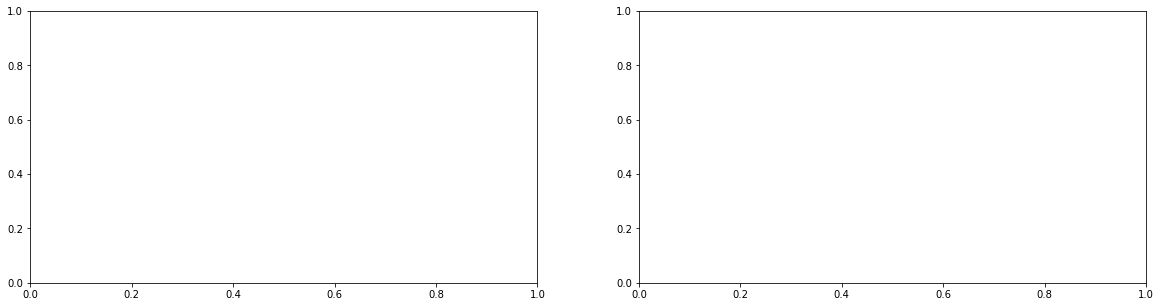

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

p = az.plot_autocorr(sample_dataset, ax = axes, max_lag=100, combined=True, figsize=(20,4))

axes[1].set_ylabel('autocorrelation')
axes[1].set_xlabel('lag')


In [ ]:
p = az.plot_ess(sample_dataset, kind='local')
p = az.plot_ess(sample_dataset, kind='quantile')

fig, axes = plt.subplots(1, 2, figsize=(20,5))
p = az.plot_ess(sample_dataset, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
#p = az.plot_ess(sample_dataset_1, kind='evolution', ax=axes, extra_kwargs={"color": "lightsteelblue"})
